In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

veriler = pd.read_csv("veriler/Ads_CTR_Optimisation.csv")
veriler

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [16]:
import math

N = 10000 # 10.000 tıklama 
d = 10 # toplam 10 ilan var
# Ri(n)
oduller = [0]*d # odüller 10 tane elemanlı bir liste olacak, listenin her bir elemanı 0 olacak dolayısıyla 10 ilanın da odül değeri 0 olacak.
# Ni(n)
tiklamalar = [0]*d # o ana kadarki tıklamalar
toplam = 0 # toplam ödül
secilenler = []

for n in range(0,N):
    ad = 0 # seçilen ilan
    max_ucb = 0
    
    for i in range(0,d): # Bütün ilanların teker teker ihtimallerine bakacağız. tüm ilanlara bak bunların içinden UCb değeri en yüksek olana bul.
        
        if(tiklamalar[i] > 0): # 0'daki tanımsızlığı kaldırmak için bu ilana en az bir kere tıklanmış olaması lazım
            ortalama = oduller[i]/tiklamalar[i]
            delta = math.sqrt(3/2 * math.log(n)/tiklamalar[i])
            ucb = ortalama + delta
        else: # bu durum 0'dan büyük değilse
            ucb = 100000
            
        if max_ucb < ucb: # max ucb'den daha yüksek bir ucb varsa, yoksa ad = 0
            max_ucb = ucb # max'ı güncelle.
            ad = i # şuan bulduğumuz ad'i de buraya koy.
            
    secilenler.append(ad) # en yüksek UCB değerine sahip ilanı secilenler içerisine koyuyoruz.
    tiklamalar[ad] = tiklamalar[ad] + 1 # ilanın tıklama sayısını arttırıyoruz.
    odul = veriler.values[n,ad] # tıklanan değer şayet seçtiğimiz ilan ise onu da ödül olarak gösterelim. verilerdeki n'nci satır = 1 ise odul = 1
    oduller[ad] = oduller[ad] + odul # bir ödül gelidyse o ilanın ödülünü de ödül kadar arttır.
    toplam = toplam + odul
    
print("Toplam Ödül", toplam)

Toplam Ödül 2211


(array([ 502.,  364.,  278.,  317., 6434.,  147.,  326., 1130.,  331.,
         171.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

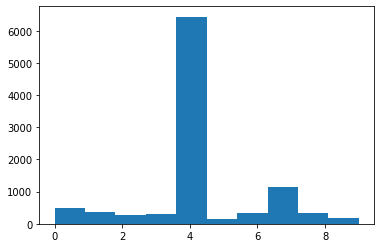

In [17]:
plt.hist(secilenler)

* **5 numaralı ilan en fazla tıklanan ilan**